In [1]:
import os, inspect, sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

CURRENT_DIR = os.path.dirname(inspect.getabsfile(inspect.currentframe()))
ROOT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.insert(0, ROOT_DIR)


In [2]:
ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "Data_File_Monthly.csv")
df = pd.read_csv(ffname, parse_dates=["DATE"])
df.DATE = pd.to_datetime(df.DATE, format="%Y-%m")
df = df.loc[60:, :]
df.head()

,DATE,PAYEMS,CEU0500000003,AWHNONAG,CES9091000001,USGOVT,UNEMPLOY,LNS13023622,LNS13023706,LNS13023654,...,MORTGAGE30US,MORTGAGE15US,DGS1,DGS2,DGS5,DGS10,Crude_Oil_Price,INDPRO,CMRMTSPL,W875RX1
60,1997-01-01,121379,NaN,34.3,2845,19593,7158,45.0,12.0,13.3,...,7.8,7.3,NaN,NaN,NaN,6.6,NaN,79.8239,949228.0,8020.2
61,1997-02-01,121687,NaN,34.4,2838,19598,7102,44.5,11.2,13.5,...,7.7,7.2,NaN,NaN,NaN,6.4,NaN,80.7816,968611.0,8058.0
62,1997-03-01,121999,NaN,34.5,2836,19608,7000,45.0,11.2,14.3,...,7.9,7.4,NaN,NaN,NaN,6.7,NaN,81.3388,969052.0,8096.5
63,1997-04-01,122291,NaN,34.5,2816,19603,6873,44.7,11.3,14.3,...,8.1,7.7,NaN,NaN,NaN,6.9,NaN,81.3611,972290.0,8109.6
64,1997-05-01,122554,NaN,34.6,2813,19601,6655,44.3,11.9,13.9,...,7.9,7.5,NaN,NaN,NaN,6.7,NaN,81.8326,972051.0,8153.8


In [3]:
# ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "USRECM.csv")
# df_recm = pd.read_csv(ffname, parse_dates=["DATE"])
# df_recm.DATE = pd.to_datetime(df_recm.DATE, format="%Y-%m")
# df_recm.head()

Make a clen copy of data. This allows us to modify freely while we have always the original data for any further reference.

In [4]:
df_original = df.copy() 

Reindex data frame per the time stamps

In [5]:
df.set_index("DATE", inplace=True)
df.head()

,PAYEMS,CEU0500000003,AWHNONAG,CES9091000001,USGOVT,UNEMPLOY,LNS13023622,LNS13023706,LNS13023654,MVPHGFD027MNFRBDAL,...,MORTGAGE30US,MORTGAGE15US,DGS1,DGS2,DGS5,DGS10,Crude_Oil_Price,INDPRO,CMRMTSPL,W875RX1
DATE,,,,,,,,,,,,,,,,,,,,,
1997-01-01,121379,NaN,34.3,2845,19593,7158,45.0,12.0,13.3,3512.2,...,7.8,7.3,NaN,NaN,NaN,6.6,NaN,79.8239,949228.0,8020.2
1997-02-01,121687,NaN,34.4,2838,19598,7102,44.5,11.2,13.5,3537.0,...,7.7,7.2,NaN,NaN,NaN,6.4,NaN,80.7816,968611.0,8058.0
1997-03-01,121999,NaN,34.5,2836,19608,7000,45.0,11.2,14.3,3522.9,...,7.9,7.4,NaN,NaN,NaN,6.7,NaN,81.3388,969052.0,8096.5
1997-04-01,122291,NaN,34.5,2816,19603,6873,44.7,11.3,14.3,3446.7,...,8.1,7.7,NaN,NaN,NaN,6.9,NaN,81.3611,972290.0,8109.6
1997-05-01,122554,NaN,34.6,2813,19601,6655,44.3,11.9,13.9,3485.1,...,7.9,7.5,NaN,NaN,NaN,6.7,NaN,81.8326,972051.0,8153.8


Check on the missing values

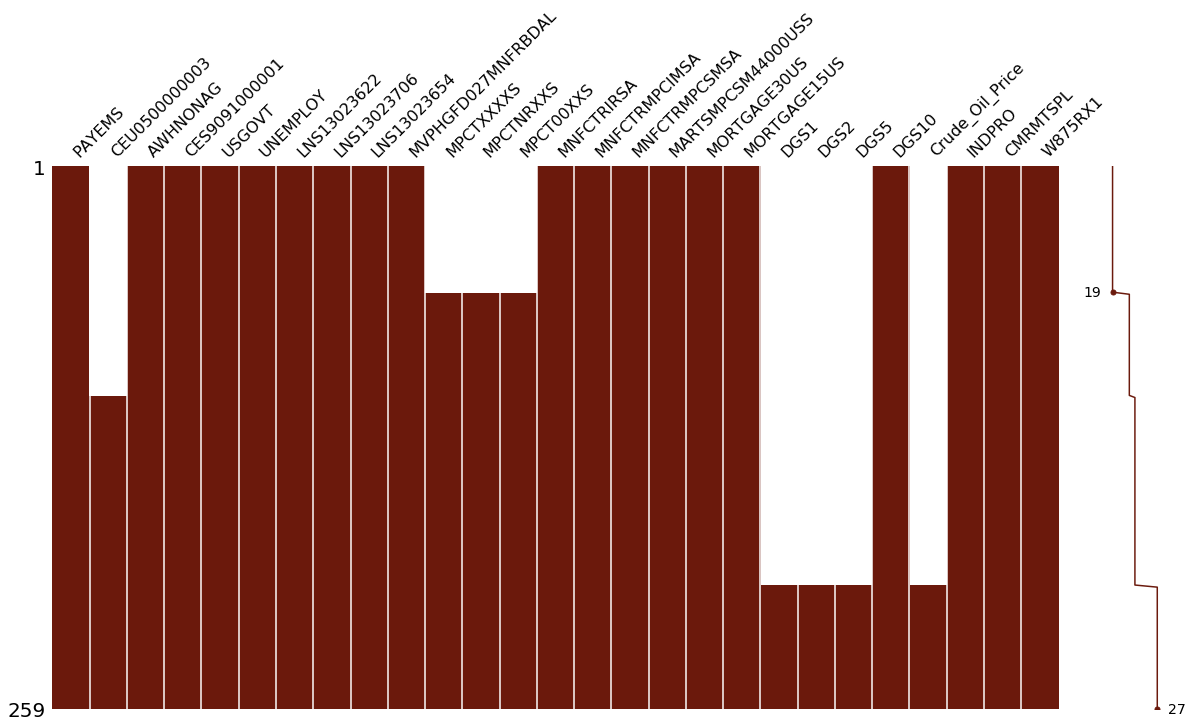

In [6]:
msno.matrix(df=df, figsize=(20, 10), color=(0.42, 0.1, 0.05))

Drop any columns with NaN values

In [7]:
# drop columns: axis=1; drop rows: axis=0
df.dropna(axis=1, inplace=True)

Index(['PAYEMS', 'AWHNONAG', 'CES9091000001', 'USGOVT', 'UNEMPLOY',
       'LNS13023622', 'LNS13023706', 'LNS13023654', 'MVPHGFD027MNFRBDAL',
       'MNFCTRIRSA', 'MNFCTRMPCIMSA', 'MNFCTRMPCSMSA', 'MARTSMPCSM44000USS',
       'MORTGAGE30US', 'MORTGAGE15US', 'DGS10', 'INDPRO', 'CMRMTSPL',
       'W875RX1'],
      dtype='object')

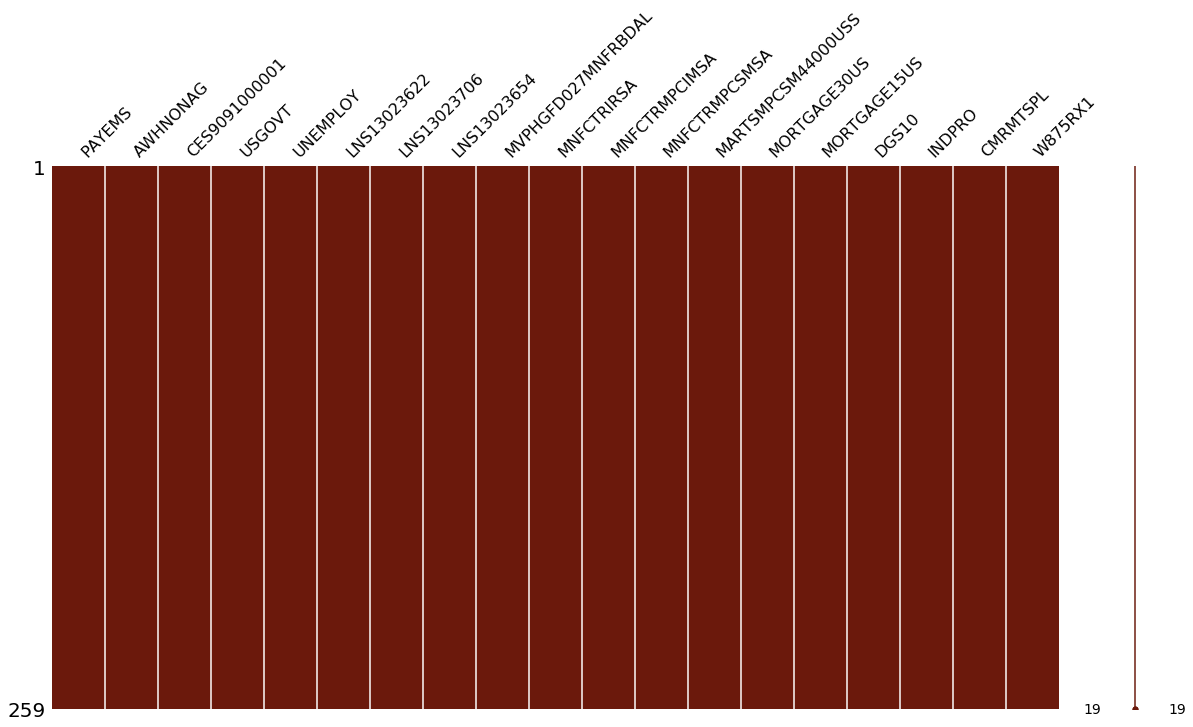

In [8]:
msno.matrix(df=df, figsize=(20, 10), color=(0.42, 0.1, 0.05))
df.columns

Check on distribution of variables

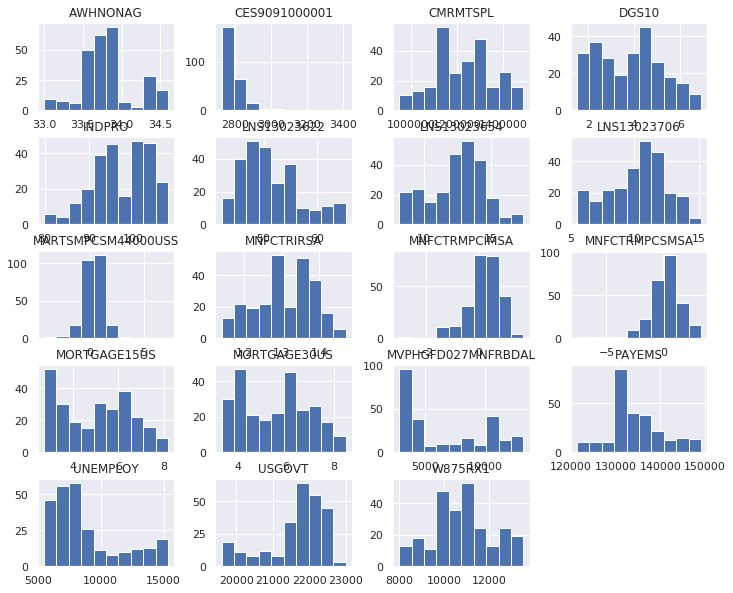

In [9]:
sns.set()
_ = df.hist(sharex=False,
            sharey=False,
            figsize=(12, 10))
plt.show()

Check on variable correlations

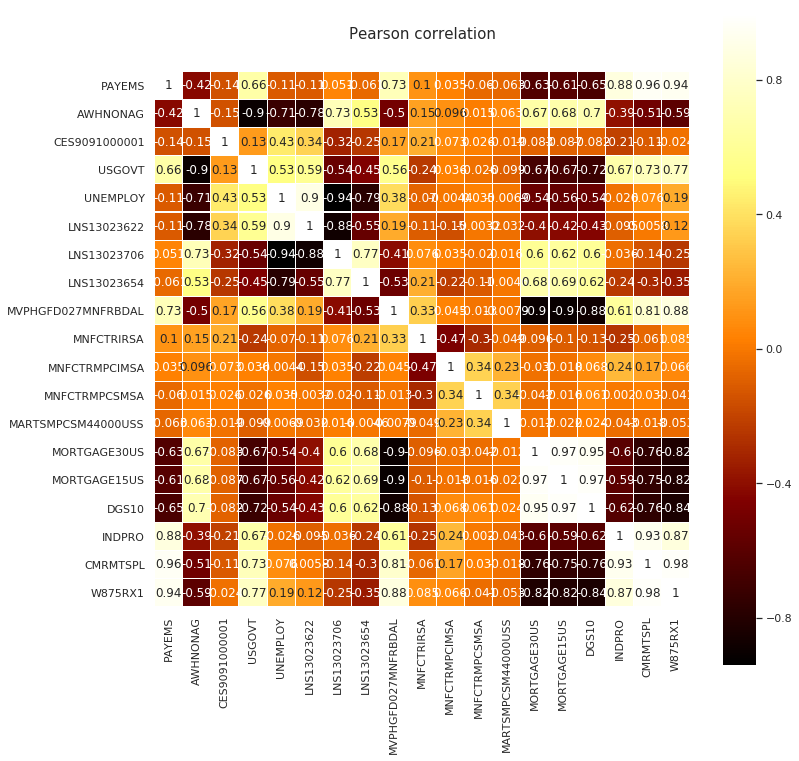

In [10]:
colormap = plt.cm.afmhot
plt.figure(figsize=(12,12))
plt.title('Pearson correlation', y=1.05, size=15)
sns.heatmap(df.corr(),
            linewidths=0.1,
            vmax=1.0,
            square=True, 
            cmap=colormap,
            linecolor='white',
            annot=True)
plt.show()

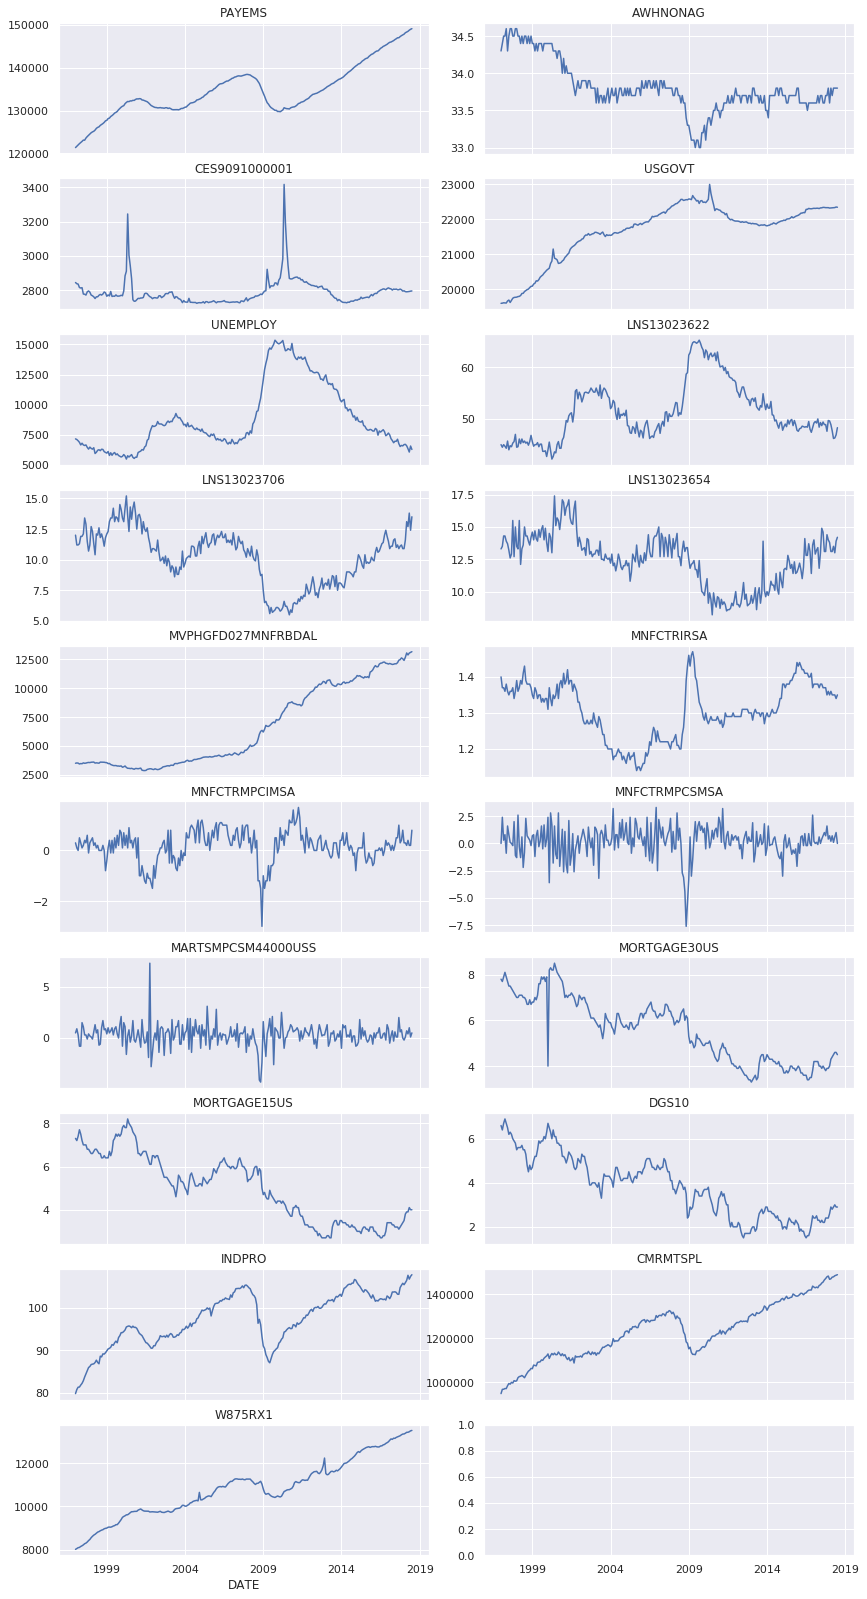

In [11]:
ncols = 2
fig, axs = plt.subplots(nrows=int(np.ceil(df.columns.size/ncols)),
                        ncols=ncols,
                        figsize=(12, 22),
                        sharex=True)
fig.tight_layout()
for idx, label in enumerate(df.columns):
    i = idx // ncols
    j = idx % ncols
    df[label].plot(title=label, ax=axs[i, j])

Drop possible redundant columns.

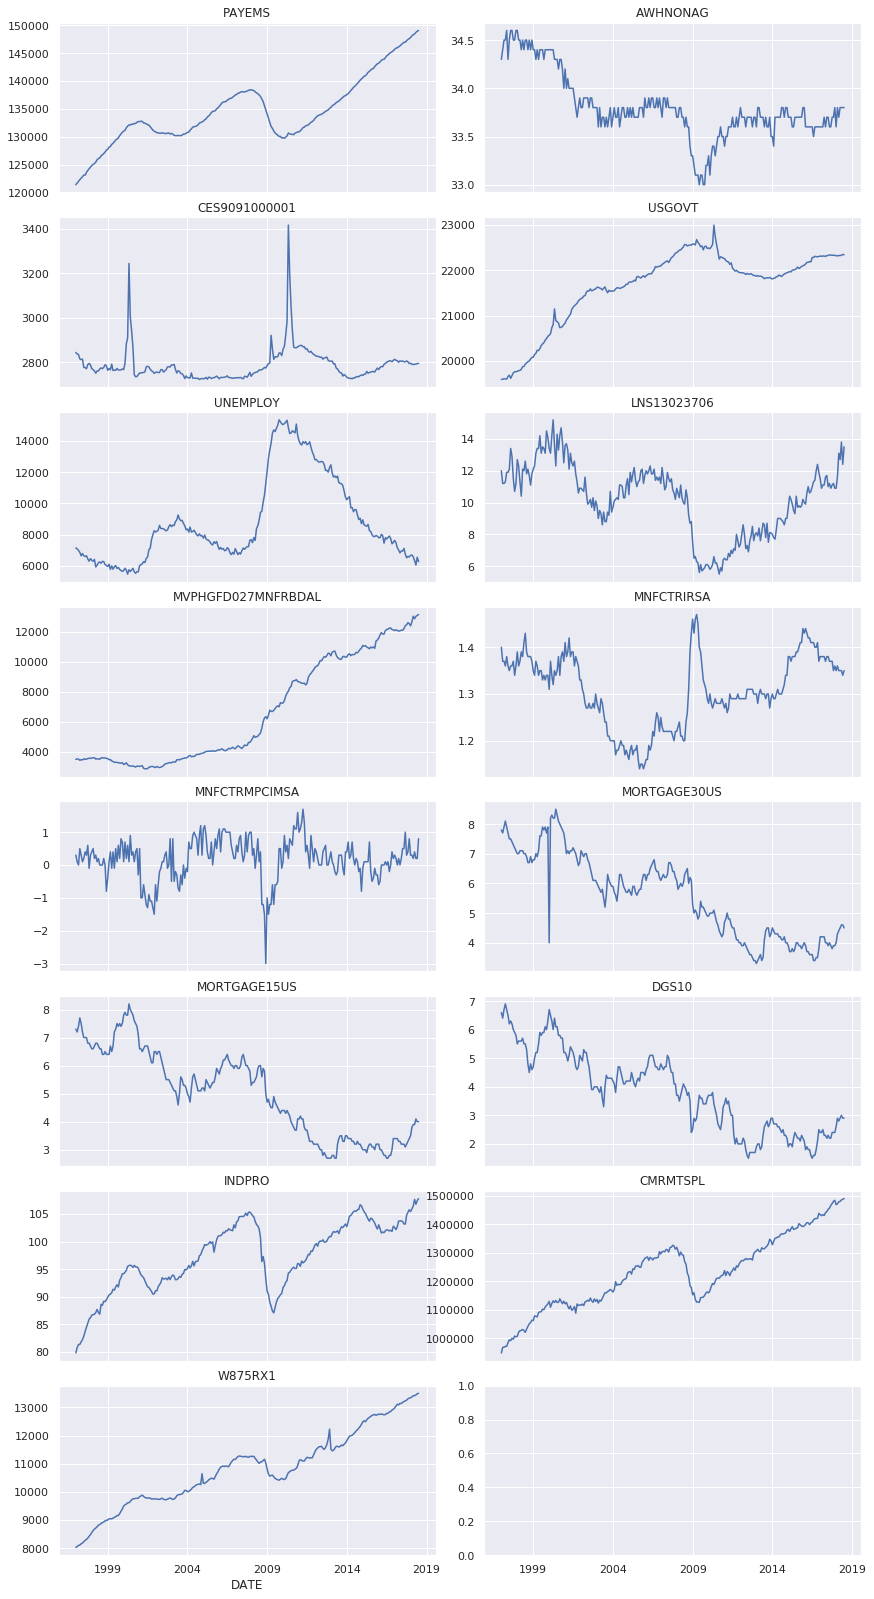

In [12]:
df.drop(labels=["MNFCTRMPCSMSA", "LNS13023654", "LNS13023622", "MARTSMPCSM44000USS"], axis=1, inplace=True)
ncols = 2
fig, axs = plt.subplots(nrows=int(np.ceil(df.columns.size/ncols)),
                        ncols=ncols,
                        figsize=(12, 22),
                        sharex=True)
fig.tight_layout()
for idx, label in enumerate(df.columns):
    i = idx // ncols
    j = idx % ncols
    df[label].plot(title=label, ax=axs[i, j])

Check on autocorrelation plots to get an estimate of lag in the time series

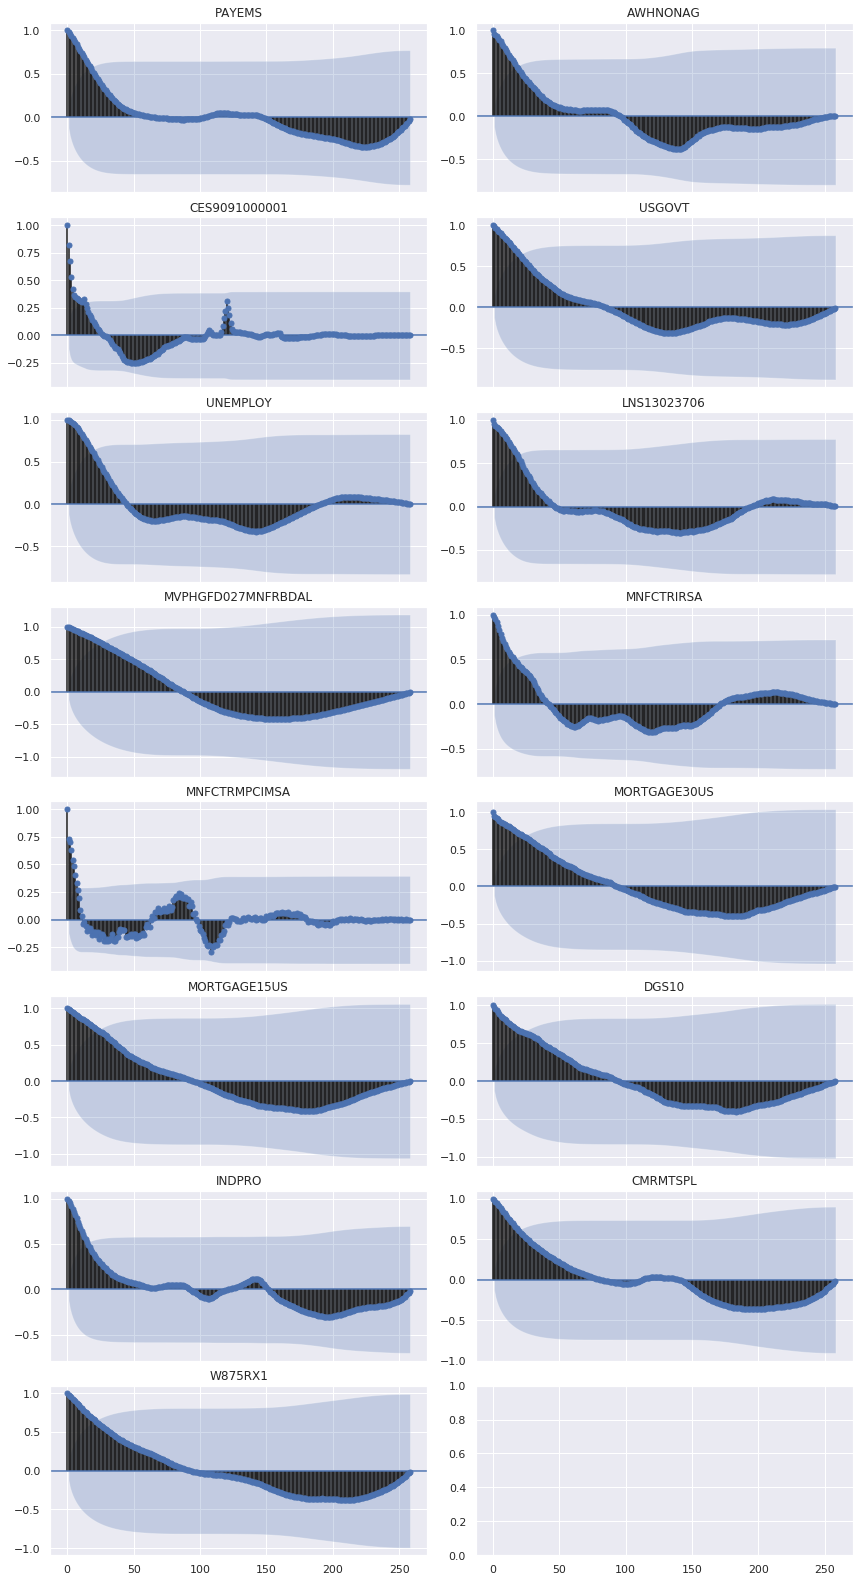

In [13]:
ncols = 2
fig, axs = plt.subplots(nrows=int(np.ceil(df.columns.size/ncols)),
                        ncols=ncols,
                        figsize=(12, 22),
                        sharex=True)
fig.tight_layout()
for idx, label in enumerate(df.columns):
    i = idx // ncols
    j = idx % ncols
    plot_acf(df[label], title=label, ax=axs[i, j])

Detrend time series (make time series stationary)

In [14]:
#
#
#
#
#

Save prcessed data

In [15]:
ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "data_monthly_processed.csv")
df.to_csv(ffname)

In [16]:
df.shape

(259, 15)